In [1]:
# Installera nödvändiga bibliotek om de inte redan är installerade
!pip install pandas dash bokeh ipywidgets matplotlib seaborn

# Importera de nödvändiga biblioteken
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


## Förklaring av Koden:
Denna kod används för att installera och importera de bibliotek som behövs för dataanalys och visualisering.

1. Installera Nödvändiga Bibliotek:
* Här installeras de bibliotek som behövs, om de inte redan är installerade. Det inkluderar:
* pandas: För datahantering.
* dash: För att skapa interaktiva webbapplikationer.
* bokeh: För interaktiv visualisering.
* ipywidgets: För interaktiva element i Jupyter Notebook.
* matplotlib och seaborn: För att skapa grafer och diagram.

2. Importera Bibliotek:
* Här importeras de bibliotek som behövs för att hantera data, skapa diagram och arbeta med ZIP-filer.
* pandas: Används för datahantering och analys.
* sqlite3: Används för att hantera SQLite-databaser.
* matplotlib och seaborn: Används för att skapa grafer och visualiseringar.
* zipfile: Används för att extrahera innehåll från ZIP-filer.

Denna kod säkerställer att alla nödvändiga verktyg är redo att användas för analys och visualisering av data.

In [2]:
# Sökväg till ZIP-filen
zip_file_path = r'C:\Users\mayas\Downloads\archive.zip'

# Extrahera filen till en temporär mapp
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Läs in CSV-filen från den extraherade mappen
csv_file_path = 'extracted_data/ecommerce_customer_data_large.csv'
df = pd.read_csv(csv_file_path)

# Förhandsgranska de första raderna
print(df.head())


   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  
0   31  

## Förklaring av Koden:
Denna kod används för att extrahera en ZIP-fil, läsa in en CSV-fil från den och sedan visa de första raderna av data.

1. Definiera Sökväg till ZIP-filen:
Här anges sökvägen till ZIP-filen som innehåller datafilen.

2. Extrahera ZIP-filen:
ZIP-filen öppnas och extraheras till en temporär mapp med namnet extracted_data.

3. Läs in CSV-filen:
CSV-filen som finns i den extraherade mappen läses in som en DataFrame (df) med hjälp av pd.read_csv().

4. Visa de Första Raderna:
Koden skriver ut de första raderna av data för att ge en förhandsgranskning av innehållet i CSV-filen.

* Denna kod gör det möjligt att snabbt få tillgång till data från en ZIP-fil och att förhandsgranska den för vidare analys.

In [3]:
# Skapa och anslut till en SQLite-databas
con = sqlite3.connect('ecommerce_data.db')

# Ladda upp data till en tabell i databasen
df.to_sql('customers', con, if_exists='replace', index=False)


250000

## Förklaring av Koden:
Denna kod används för att skapa en SQLite-databas och ladda upp data till en tabell i databasen.

1. Skapa och Anslut till en Databas:
* Här skapas en ny SQLite-databas med namnet ecommerce_data.db.
* Om databasen redan finns, ansluter koden till den.

2. Ladda Upp Data till Databasen:
* Data från DataFrame df laddas upp till en tabell i databasen med namnet customers.
* if_exists='replace': Om tabellen redan finns, ersätts den med den nya datan.
* index=False: Anger att DataFrame-indexet inte ska inkluderas i databastabellen.

Koden skapar en databas och laddar upp kunddata till en ny tabell, vilket gör att informationen blir lätt tillgänglig för SQL-frågor och analyser.

In [4]:
# SQL-fråga för att hämta de mest sålda produktkategorierna
query = """
SELECT [Product Category] AS Product_Category, SUM([Total Purchase Amount]) AS Total_Sales
FROM customers
GROUP BY [Product Category]
ORDER BY Total_Sales DESC
LIMIT 10
"""
top_products = pd.read_sql_query(query, con)
print(top_products)

con.close()


  Product_Category  Total_Sales
0             Home    171138916
1         Clothing    170716122
2      Electronics    170146025
3            Books    169345236


## Förklaring av Koden:

Denna kod används för att hämta de mest sålda produktkategorierna från en databas med hjälp av en SQL-fråga.

1. SQL-fråga för att Hämta Data:
* SELECT: Väljer kolumnerna "Product Category" och summerar "Total Purchase Amount" för att beräkna den totala försäljningen per produktkategori.
* GROUP BY: Grupperar resultaten per produktkategori.
* ORDER BY Total_Sales DESC: Sorterar de grupperade resultaten i fallande ordning baserat på total försäljning.
* LIMIT 10: Begränsar resultatet till de 10 mest sålda produktkategorierna.

2. Hämta och Visa Resultatet:
* Frågan körs mot databasen och resultaten laddas in i en DataFrame.
* Resultatet skrivs ut och visar de mest sålda produktkategorierna baserat på total försäljning.

Koden hjälper till att snabbt få en översikt över vilka produktkategorier som har högst försäljning.


Koden `con.close()` används för att stänga anslutningen till databasen när du är färdig med att jobba med den. Detta är viktigt eftersom:

- **Det frigör resurser**: Om anslutningen förblir öppen, kan den använda datorns minne och andra resurser, vilket kan göra programmet långsammare.
- **Det minskar risken för problem**: Om flera personer eller processer försöker använda databasen samtidigt, kan öppna anslutningar orsaka konflikter.
- **Det ökar säkerheten**: Genom att stänga anslutningen minskar du risken för att någon oavsiktligt ändrar eller får åtkomst till data.

Använd alltid `con.close()` när du är klar med databasen för att hålla programmet säkert och effektivt.

In [5]:
import ipywidgets as widgets
from IPython.display import display

# Skapa en interaktiv slider som kan användas i Jupyter Notebook
slider = widgets.IntSlider(value=5, min=0, max=10, step=1)
display(slider)


IntSlider(value=5, max=10)

## Förklaring av Koden

Denna kod används för att skapa en interaktiv slider med hjälp av biblioteket ipywidgets, som kan användas direkt i en Jupyter Notebook.

1. Skapa en Slider:
* Här skapas en slider med IntSlider-widgeten.
* value=5: Startvärdet är satt till 5.
* min=0 och max=10: Slidern kan röra sig mellan 0 och 10.
* step=1: Slidern rör sig i steg om 1.

2. Visa Slidern:
Slidern visas i Jupyter Notebook, och användaren kan dra i den för att välja ett värde mellan 0 och 10.

* Koden skapar alltså en enkel, interaktiv slider som gör det möjligt att välja ett heltal inom det angivna intervallet i Jupyter Notebook.

In [6]:
import dash
from dash import dcc, html
import plotly.express as px

# Förbered data för en enkel graf
dash_df = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [5, 10, 20]})
fig = px.bar(dash_df, x='Category', y='Values')

# Skapa och kör Dash-appen
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8061)


## Förklaring av Koden

Denna kod används för att skapa en enkel webbapplikation med hjälp av Dash som visar ett stapeldiagram över kategorivärden.

1. Förbered Data och Skapa Diagram:
* Här skapas en DataFrame med tre kategorier (A, B, C) och deras värden.
* Ett stapeldiagram genereras med Plotly Express, där x-axeln representerar kategorier och y-axeln representerar värdena.

2. Skapa Dash-applikationen:
En ny Dash-applikation skapas som kommer att användas för att visa diagrammet.

3. Definiera Layout och Lägg till Diagram:
Layouten för applikationen definieras som ett enkelt Div-element som innehåller diagrammet.

4. Kör Applikationen:
Applikationen startas och körs på port 8061. debug=True gör att appen uppdateras automatiskt vid ändringar i koden.

* Koden skapar alltså en enkel webbapp där användaren kan se ett stapeldiagram interaktivt i en webbläsare.

In [7]:
from bokeh.plotting import figure, output_file, show

# Skapa en enkel linjediagram med Bokeh
output_file("plot.html")
p = figure(title="Enkel linjediagram")
p.line([1, 2, 3, 4], [1, 4, 2, 3])
show(p)


## Förklaring av Koden:

Denna kod används för att skapa ett enkelt linjediagram med hjälp av Bokeh-biblioteket och visa det i en webbläsare.

1. Definiera Outputfil:
Här definieras outputfilen där diagrammet kommer att sparas, i det här fallet som en HTML-fil med namnet "plot.html".

2. Skapa en Figur och Lägg till Linjediagram:
En figur skapas med titeln "Enkel linjediagram".
Sedan ritas en linje där x-värdena är [1, 2, 3, 4] och y-värdena är [1, 4, 2, 3].

3. Visa Diagrammet:
Diagrammet visas i webbläsaren. Eftersom Bokeh genererar en HTML-fil, kommer diagrammet att öppnas i en webbläsare och visas interaktivt.

* Koden skapar alltså ett enkelt linjediagram som kan användas för att visualisera data på ett interaktivt sätt.

In [8]:
# Högsta 10 försäljningar baserat på total köpsumma
top_10_sales = df[['Customer Name', 'Total Purchase Amount']].drop_duplicates().sort_values(by='Total Purchase Amount', ascending=False).head(10)
print("Högsta 10 försäljningar:")
print(top_10_sales)


Högsta 10 försäljningar:
            Customer Name  Total Purchase Amount
180048         Gary White                   5350
26075       David Patrick                   5349
53928        Kyle Jackson                   5349
125782        Joan Carson                   5349
236044    Jeremiah Barnes                   5348
204753       Theresa Hunt                   5346
5322          Kevin Roman                   5345
156812       Mary Johnson                   5345
113138     Kathleen Perez                   5344
240660  Danielle Williams                   5344


## Förklaring av Koden:

Denna kod används för att hitta de 10 högsta försäljningarna baserat på den totala köpsumman för varje kund.

1. Filtrera och Sortera Försäljningsdata:
* Först tas dubbletter bort för att säkerställa att varje kunds försäljning är unik.
* Sedan sorteras data efter kolumnen "Total Purchase Amount" i fallande ordning.
* De 10 första raderna hämtas, vilket visar de kunder med högst köpsumma.

2. Visa Resultatet:

Koden skriver ut namnen på de kunder som har gjort de 10 största köpen, vilket kan ge insikter om vilka kunder som spenderar mest.

* Denna kod hjälper oss att identifiera de mest värdefulla kunderna baserat på deras köpbeteende, vilket kan vara användbart för att utveckla kundlojalitetsstrategier.

In [9]:
# Lägsta 10 försäljningar baserat på total köpsumma
lowest_10_sales = df[['Customer Name', 'Total Purchase Amount']].drop_duplicates().sort_values(by='Total Purchase Amount', ascending=True).head(10)
print("\nLägsta 10 försäljningar:")
print(lowest_10_sales)



Lägsta 10 försäljningar:
                 Customer Name  Total Purchase Amount
170528             Ashley Hall                    100
243752             Thomas Cole                    100
96395               Laura Rios                    101
189989                 Lori Yu                    102
177036            Lisa Jackson                    102
191197            Colleen Pace                    103
104374             James Welch                    104
113854            Molly Moreno                    105
110873  Mrs. Elizabeth Kim DDS                    105
171453                  Amy Yu                    106


## Förklaring av Koden

Denna kod används för att hitta de 10 lägsta försäljningarna baserat på den totala köpsumman för varje kund.

1. Filtrera och Sortera Försäljningsdata:
* Först tas dubbletter bort för att säkerställa att varje kunds försäljning är unik.
* Sedan sorteras data efter kolumnen "Total Purchase Amount" i stigande ordning.
* De 10 första raderna hämtas, vilket visar de kunder med lägst köpsumma.

2. Visa Resultatet:

Koden skriver ut namnen på de kunder som har gjort de 10 lägsta köpen, vilket kan ge insikter om vilka kunder som köper minst.

* Denna kod hjälper oss att identifiera de kunder som har lägst köpbeteende, vilket kan vara användbart för att rikta marknadsföringsstrategier.

Försäljning enligt kön:
      Kön  Total Försäljning
0  Female          338559456
1    Male          342786843


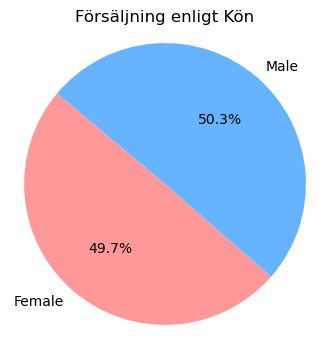

In [10]:
# Försäljning enligt kön
sales_by_gender = df.groupby('Gender')['Total Purchase Amount'].sum().reset_index()
sales_by_gender.columns = ['Kön', 'Total Försäljning']
print("Försäljning enligt kön:")
print(sales_by_gender)



# Skapa ett cirkeldiagram för försäljning enligt kön
plt.figure(figsize=(4, 4))
plt.pie(sales_by_gender['Total Försäljning'], labels=sales_by_gender['Kön'], autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Försäljning enligt Kön')
plt.axis('equal')  # Gör cirkeln rund
plt.show()


## Förklaring av Koden: 
Denna kod används för att analysera försäljningen baserat på kön och att visualisera resultaten med ett cirkeldiagram.

1. Beräkna Försäljning för Varje Kön:
Här grupperas data efter kön och den totala försäljningen för varje kön beräknas. Resultatet visar hur mycket män och kvinnor har bidragit till den totala försäljningen.

2. Skapa Cirkeldiagram för Försäljning enligt Kön:
Ett cirkeldiagram skapas för att visa andelen försäljning som varje kön står för. Varje del av cirkeln representerar ett kön, och procentsatsen visar deras bidrag till den totala försäljningen.

* Denna kod hjälper till att snabbt förstå hur försäljningen fördelas mellan könen i kundgruppen.



Försäljning enligt ålderskategori:
  Ålderskategori  Total Försäljning
0         Senior          262728575
1         Ungdom          152311834
2          Vuxen          266305890


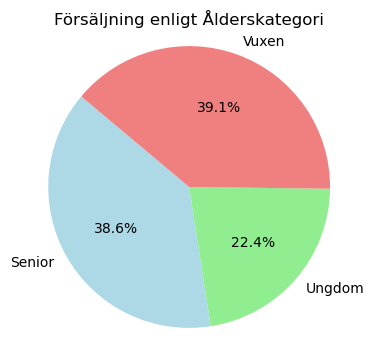

In [11]:
# Skapa en ny kolumn för ålderskategori
def ålderskategori(age):
    if age < 30:
        return 'Ungdom'
    elif 30 <= age <= 50:
        return 'Vuxen'
    else:
        return 'Senior'

df['Ålderskategori'] = df['Age'].apply(ålderskategori)

# Försäljning enligt ålderskategori
sales_by_age_category = df.groupby('Ålderskategori')['Total Purchase Amount'].sum().reset_index()
sales_by_age_category.columns = ['Ålderskategori', 'Total Försäljning']
print("\nFörsäljning enligt ålderskategori:")
print(sales_by_age_category)



# Skapa ett cirkeldiagram för försäljning enligt ålderskategori
plt.figure(figsize=(4, 4))
plt.pie(sales_by_age_category['Total Försäljning'], labels=sales_by_age_category['Ålderskategori'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Försäljning enligt Ålderskategori')
plt.axis('equal')  # Gör cirkeln rund
plt.show()


## Förklaring av Koden:

Denna kod används för att analysera försäljningen baserat på kundernas ålderskategori och visualisera resultaten med ett cirkeldiagram.

1. Skapa Ålderskategori:
Funktionen ålderskategori skapar en ny kolumn i data där varje kund klassificeras i en ålderskategori: "Ungdom" (under 30), "Vuxen" (30 till 50), eller "Senior" (över 50).

2. Beräkna Försäljning för Varje Ålderskategori:
Data grupperas efter ålderskategori, och den totala försäljningen för varje kategori beräknas. Resultatet visar hur mycket varje åldersgrupp har bidragit till den totala försäljningen.

3. Skapa Cirkeldiagram:
Ett cirkeldiagram skapas för att visuellt visa andelen försäljning för varje ålderskategori. Varje del av cirkeln representerar en ålderskategori, och procentsatsen visar deras bidrag till den totala försäljningen.

* Koden hjälper till att förstå vilka åldersgrupper som står för störst del av försäljningen i e-handeln.


Top 5 mest sålda produkter:
  Produktkategori  Total Försäljning
3            Home          171138916
1        Clothing          170716122
2     Electronics          170146025
0           Books          169345236

De 5 minst sålda produkterna:
  Produktkategori  Total Försäljning
0           Books          169345236
2     Electronics          170146025
1        Clothing          170716122
3            Home          171138916


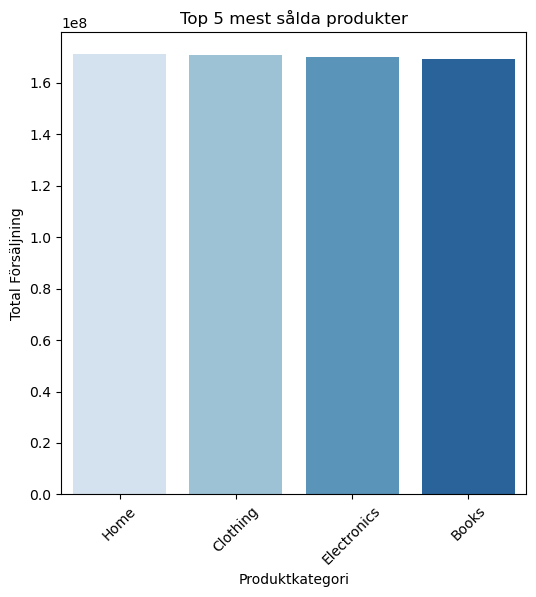

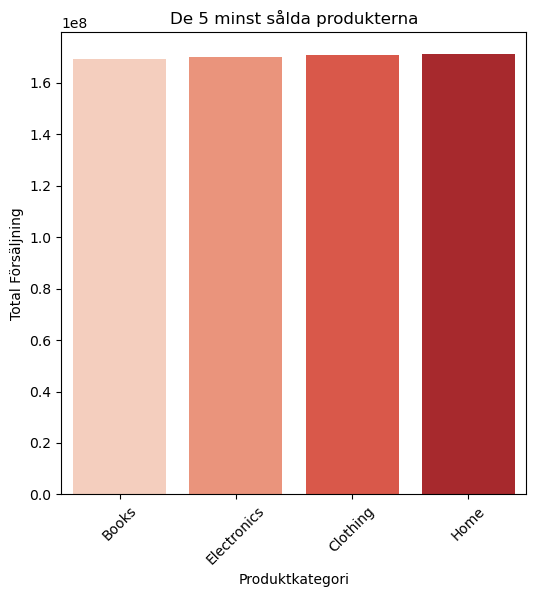

In [12]:
# Top 5 mest sålda produkter
top_5_products = df.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
top_5_products = top_5_products.sort_values(by='Total Purchase Amount', ascending=False).head(5)
top_5_products.columns = ['Produktkategori', 'Total Försäljning']
print("Top 5 mest sålda produkter:")
print(top_5_products)

# De 5 minst sålda produkterna
lowest_5_products = df.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
lowest_5_products = lowest_5_products.sort_values(by='Total Purchase Amount', ascending=True).head(5)
lowest_5_products.columns = ['Produktkategori', 'Total Försäljning']
print("\nDe 5 minst sålda produkterna:")
print(lowest_5_products)


# Diagram för de 5 mest sålda produkterna
plt.figure(figsize=(6, 6))
sns.barplot(x='Produktkategori', y='Total Försäljning', data=top_5_products, palette='Blues')
plt.title('Top 5 mest sålda produkter')
plt.xticks(rotation=45)
plt.xlabel('Produktkategori')
plt.ylabel('Total Försäljning')
plt.show()

# Diagram för de 5 minst sålda produkterna
plt.figure(figsize=(6, 6))
sns.barplot(x='Produktkategori', y='Total Försäljning', data=lowest_5_products, palette='Reds')
plt.title('De 5 minst sålda produkterna')
plt.xticks(rotation=45)
plt.xlabel('Produktkategori')
plt.ylabel('Total Försäljning')
plt.show()


### Förklaring av Koden

Denna kod används för att analysera försäljningen av olika produktkategorier i en e-handelsdatabas och visualisera de mest och minst sålda produkterna. Syftet är att identifiera vilka produktkategorier som presterar bäst och vilka som presterar sämst, baserat på den totala försäljningen.

1. **Top 5 mest sålda produkter**:
   Först grupperas data efter produktkategori och den totala försäljningen för varje kategori beräknas genom att summera värdena i kolumnen "Total Purchase Amount". Data sorteras sedan i fallande ordning för att identifiera de fem produktkategorier med högst försäljning. Dessa lagras i `top_5_products` för vidare användning och visualisering.

2. **De 5 minst sålda produkterna**:
   Samma process upprepas för att identifiera de fem produktkategorier med lägst försäljning. Data sorteras i stigande ordning och resultatet sparas i `lowest_5_products`.

3. **Diagram för de 5 mest sålda produkterna**:
   Ett stapeldiagram skapas för att visa de fem mest sålda produkterna. X-axeln representerar produktkategorierna och Y-axeln visar den totala försäljningen. Färgpaletten "Blues" används för att framhäva försäljningsdata. Diagrammet hjälper till att visuellt jämföra vilka produkter som har högst försäljning.

4. **Diagram för de 5 minst sålda produkterna**:
   Ett stapeldiagram skapas för att visa de fem minst sålda produkterna, vilket gör det enkelt att se vilka produkter som inte presterar lika bra. Färgpaletten "Reds" används för att betona de låga försäljningssiffrorna, vilket ger en tydlig visuell kontrast till de mest sålda produkterna.

Denna kod ger en snabb och visuell översikt över produktförsäljningen inom olika kategorier, vilket kan användas för att fatta beslut om produktstrategier. Genom att analysera dessa resultat kan företaget fokusera på att förbättra marknadsföringen för mindre sålda produkter eller förstärka utbudet av de mest populära produkterna.


In [14]:
!pip install xgboost


In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Förbered data och dela upp i funktioner och målvariabel
X = df[['Product Price', 'Quantity', 'Customer Age', 'Returns']]
X = pd.get_dummies(df[['Product Category', 'Payment Method', 'Gender']], drop_first=True).join(X)
y = df['Total Purchase Amount']

# Dela upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa en XGBoost-modell
xgb_model = XGBRegressor(random_state=42)

# Ange ett parametergrid för att testa olika värden
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Använd GridSearchCV för att justera parametrarna
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hämta den bästa modellen och dess parametrar
best_xgb_model = grid_search.best_estimator_

# Gör en prediktion med den bästa modellen och utvärdera den
y_pred_xgb = best_xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

rmse_xgb, mae_xgb, r2_xgb, grid_search.best_params_


(1438.335419519416,
 1245.5186141796876,
 0.002939573969875986,
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200})

### Förklaring av Koden

1. **Importera bibliotek**: Först importerar vi nödvändiga verktyg och funktioner, inklusive `XGBRegressor` för att skapa en XGBoost-modell och `GridSearchCV` för att hitta de bästa inställningarna för modellen.

2. **Förbereda data**:
   - Vi väljer kolumnerna `Product Price`, `Quantity`, `Customer Age`, och `Returns` som funktioner (det vi ska använda för att göra en förutsägelse).
   - Vi omvandlar kategoriska (icke-numeriska) kolumner som `Product Category`, `Payment Method`, och `Gender` till numeriska med `pd.get_dummies()`.
   - `y` är den kolumn som vi vill förutsäga, alltså `Total Purchase Amount`.

3. **Dela upp data**:
   - Vi delar upp data i en träningsdel (`X_train`, `y_train`) och en testdel (`X_test`, `y_test`). Detta gör vi för att kunna träna modellen och sedan testa hur bra den fungerar på nya data.

4. **Skapa en XGBoost-modell**:
   - Vi skapar en XGBoost-modell (`xgb_model`) och sätter ett parametergrid (ett antal värden vi vill testa för olika inställningar).

5. **Justera parametrar med `GridSearchCV`**:
   - Vi använder `GridSearchCV` för att testa olika inställningar av modellen och hitta de bästa värdena. Det innebär att `GridSearchCV` provar olika kombinationer av `n_estimators`, `max_depth`, och `learning_rate`.

6. **Prediktion och utvärdering**:
   - Efter att ha hittat de bästa parametrarna skapar vi en förutsägelse med den bästa modellen (`best_xgb_model`).
   - Vi beräknar några mått för att mäta modellens precision:
     - **RMSE**: Hur mycket modellen i genomsnitt missar i sina förutsägelser.
     - **MAE**: Medelfelet i förutsägelserna.
     - **R-squared**: Visar hur mycket av variationen i data modellen kan förklara. Värdet är mellan 0 och 1, där 1 är bäst.

Genom dessa steg får vi både en modell och de bästa parametrarna, och vi kan utvärdera modellens precision.